## Ecuaciones Diferenciales Parciales Parabólicas
#### Problema:

Resuelva el siguiente sistema:


$$\frac{\partial u}{\partial t}=5 \frac{\partial^2u}{\partial x^2} , \quad 0 \leq x \leq 2, \quad 0 \leq t \leq 0.25;$$

Con la condición inicial: $$u(x,0) = 5;$$

y las condiciones de frontera: $$u(0,t) = 0, \quad u(2,t) =  0$$

#### Solución:

In [19]:
# librerías necesarias
import numpy as np
from archivos.latex_archivos import ltx_matriz
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
plt.style.use('dark_background')

In [8]:
# Inicialización de variables
Δx = 0.25 # valor que asumieremos 
Δt = 0.002 # valor que asumieremos 

t0 = 0  # valor inferior de t
tf = 0.25  # valor superior de t
x0 = 0  # valor inferior de x
xf = 2  # valor superior de x

k = 5 # coeficiente del término cuadrático  

# Valores que definen la frontera

uxI = 5  # valor inferior de x

utI = 0  # valor inferior de t
utS = 0  # valor superior de t

Revisión de los $\Delta$ iniciales:

In [9]:
cvg = Δx ** 2 / (2 * k)
λ = k *  Δt / (Δx) ** 2
convergencia = "Hay convergencia" if cvg > Δt and λ < 0.5 else "No hay convergencia, cambie el valor de Δt"  
convergencia

'Hay convergencia'

Cálculo de la matriz inicial:

In [10]:
n = int((xf - x0) / Δx + 1)  # número de filas de la matriz
m = int((tf - t0) / Δt + 1)  # número de columnas

x = np.arange(x0, xf + Δx, Δx)
t = np.arange(t0, tf + Δt, Δt)

a = np.zeros([n, m])
b = np.zeros([n, m])

# matriz exterior  
for i in range(n):
    a[i, 0] = uxI     
    
for i in range(m):
    a[0, i] = utI

for i in range(m):
    a[-1, i] = utS

Iterraciones:

In [11]:
for j in range(m - 1):
    for i in range(n - 2):
        a[i + 1, j + 1 ] = a[i + 1, j] + λ * (a[i + 2, j] - 2 * a[i + 1, j] + a[i, j])

Resumen de las iteraciones:

In [20]:
display(HTML("<h4>Tabla de Resultados<h4>"))
pd.DataFrame(np.round(a,4))

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,5.0,4.2,3.656,3.2656,2.9723,2.7434,2.5591,2.4069,2.2787,2.1687,...,0.1376,0.1343,0.1310,0.1278,0.1247,0.1217,0.1187,0.1158,0.1130,0.1102
2,5.0,5.0,4.872,4.6979,4.5138,4.3350,4.1673,4.0124,3.8699,3.7386,...,0.2543,0.2481,0.2421,0.2362,0.2304,0.2248,0.2194,0.2140,0.2088,0.2037
3,5.0,5.0,5.000,4.9795,4.9377,4.8788,4.8073,4.7269,4.6404,4.5498,...,0.3323,0.3242,0.3163,0.3086,0.3011,0.2938,0.2866,0.2796,0.2728,0.2662
4,5.0,5.0,5.000,5.0000,4.9934,4.9756,4.9446,4.9007,4.8451,4.7796,...,0.3597,0.3509,0.3424,0.3340,0.3259,0.3180,0.3102,0.3027,0.2953,0.2881
5,5.0,5.0,5.000,4.9795,4.9377,4.8788,4.8073,4.7269,4.6404,4.5498,...,0.3323,0.3242,0.3163,0.3086,0.3011,0.2938,0.2866,0.2796,0.2728,0.2662
6,5.0,5.0,4.872,4.6979,4.5138,4.3350,4.1673,4.0124,3.8699,3.7386,...,0.2543,0.2481,0.2421,0.2362,0.2304,0.2248,0.2194,0.2140,0.2088,0.2037
7,5.0,4.2,3.656,3.2656,2.9723,2.7434,2.5591,2.4069,2.2787,2.1687,...,0.1376,0.1343,0.1310,0.1278,0.1247,0.1217,0.1187,0.1158,0.1130,0.1102
8,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Gráfico:

In [12]:
T, X = np.meshgrid(t, x)

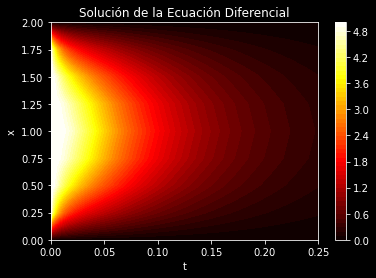

In [13]:
plt.contourf(T, X, a, 50, cmap = 'hot')
plt.title("Solución de la Ecuación Diferencial")
plt.xlabel('t')
plt.ylabel('x')
plt.colorbar()